# Pandas Viewing

In this activity, we will practice how to explore data in Pandas. This is a very important part of any data analysis.

In [1]:
import numpy as np
import pandas as pd

## Object Creation

Create a Series by passing a list of values with default integer index


In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [3]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Create a DataFrame by passing a Numpy array with a datetime index and labeled columns.

In [4]:
dates = pd.date_range('20130101', periods=6)

In [5]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

In [7]:
df

,A,B,C,D
2013-01-01,1.047054,0.126752,-0.585890,0.212865
2013-01-02,-0.265019,1.645712,0.785345,0.354505
2013-01-03,-1.015757,0.529523,0.402258,-0.625568
2013-01-04,1.470843,-0.221560,1.848729,0.956491
2013-01-05,-0.569641,-0.635478,0.905781,-1.112124
2013-01-06,0.994565,0.245459,0.649217,-0.631328


Create a DataFrame fro ma dict of objects

In [8]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})

In [9]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [10]:
df2.dtypes

A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object

In Jupyter, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that can be completed:

In [12]: df2.<TAB>  # noqa: E225, E999

df2.A

df2.bool

df2.abs

df2.boxplot

df2.add

df2.C

df2.add_prefix

df2.clip

df2.add_suffix

df2.clip_lower

df2.align

df2.clip_upper

df2.all

df2.columns

df2.any

df2.combine

df2.append

df2.combine_first

df2.apply

df2.consolidate

df2.applymap

df2.D


The list above is only subset of what is possible to do on top of the DataFrame

## Viewing Data

Here is how to view the top and bottom rows of the frame:

In [11]:
df.head()

,A,B,C,D
2013-01-01,1.047054,0.126752,-0.585890,0.212865
2013-01-02,-0.265019,1.645712,0.785345,0.354505
2013-01-03,-1.015757,0.529523,0.402258,-0.625568
2013-01-04,1.470843,-0.221560,1.848729,0.956491
2013-01-05,-0.569641,-0.635478,0.905781,-1.112124


In [12]:
df.tail(3)

,A,B,C,D
2013-01-04,1.470843,-0.221560,1.848729,0.956491
2013-01-05,-0.569641,-0.635478,0.905781,-1.112124
2013-01-06,0.994565,0.245459,0.649217,-0.631328


Display the index and columns:

In [13]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [14]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

Convert DataFrame to numpy array.

In [15]:
df.to_numpy()

array([[ 1.04705396,  0.1267524 , -0.58588973,  0.21286539],
       [-0.2650189 ,  1.64571238,  0.785345  ,  0.3545047 ],
       [-1.0157571 ,  0.52952299,  0.40225847, -0.62556791],
       [ 1.47084317, -0.22156046,  1.84872866,  0.95649102],
       [-0.56964058, -0.6354781 ,  0.90578117, -1.11212365],
       [ 0.99456459,  0.24545932,  0.64921717, -0.63132772]])

NumPy arrays have one dtype for the entire array, while Pandas DataFrames have one dtype per column. When you call DataFrame.to_numpy(), Pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being an object, which requires casting every value to a Python object. This can lead to very expensive (time and memory-consuming) operations.



The function describe() shows a quick statistic summary of your data

In [16]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.277008,0.281735,0.667573,-0.140860
std,1.021269,0.779969,0.788370,0.773762
min,-1.015757,-0.635478,-0.585890,-1.112124
25%,-0.493485,-0.134482,0.463998,-0.629888
50%,0.364773,0.186106,0.717281,-0.206351
75%,1.033932,0.458507,0.875672,0.319095
max,1.470843,1.645712,1.848729,0.956491


Tranpose your data

In [17]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,1.047054,-0.265019,-1.015757,1.470843,-0.569641,0.994565
B,0.126752,1.645712,0.529523,-0.221560,-0.635478,0.245459
C,-0.585890,0.785345,0.402258,1.848729,0.905781,0.649217
D,0.212865,0.354505,-0.625568,0.956491,-1.112124,-0.631328


and sort by column name

In [18]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.212865,-0.585890,0.126752,1.047054
2013-01-02,0.354505,0.785345,1.645712,-0.265019
2013-01-03,-0.625568,0.402258,0.529523,-1.015757
2013-01-04,0.956491,1.848729,-0.221560,1.470843
2013-01-05,-1.112124,0.905781,-0.635478,-0.569641
2013-01-06,-0.631328,0.649217,0.245459,0.994565


We can also sort DataFrame by values in specific column.

In [19]:
df.sort_values(by='B')

,A,B,C,D
2013-01-05,-0.569641,-0.635478,0.905781,-1.112124
2013-01-04,1.470843,-0.221560,1.848729,0.956491
2013-01-01,1.047054,0.126752,-0.585890,0.212865
2013-01-06,0.994565,0.245459,0.649217,-0.631328
2013-01-03,-1.015757,0.529523,0.402258,-0.625568
2013-01-02,-0.265019,1.645712,0.785345,0.354505


# Pandas Accessing

We're now going to practice how to access the data in Pandas.

In [20]:

dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})

## Getting

Below, we can find the table with a small cheat-sheet on how to get the values of DataFrame.

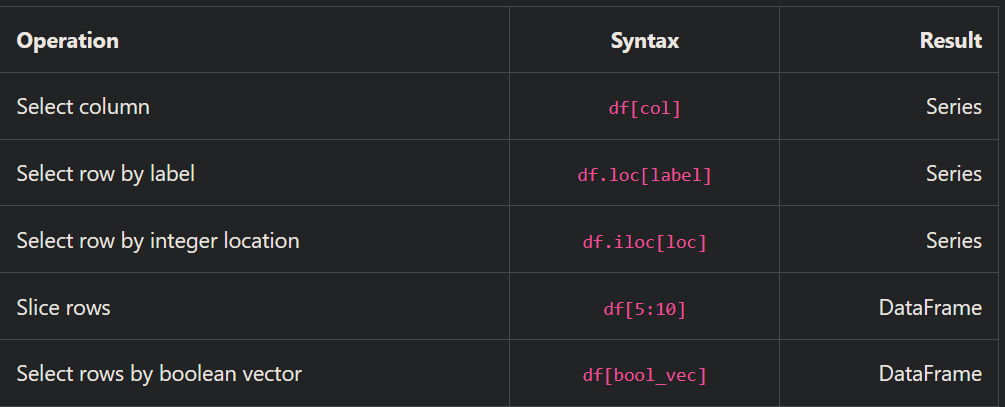



Select a single column.

In [23]: df['A']

And this is equivalent to:

In [23]: df.A

The first of the above two options is recommended because it avoids possible conflicts with any of the DataFrame methods.


Selecting via [], which slices the rows.

In [21]:
df[0:3]

,A,B,C,D
2013-01-01,1.026574,-1.351848,0.354915,-0.087144
2013-01-02,-1.163953,-0.324925,1.367062,0.923371
2013-01-03,-0.182326,1.102090,-1.729196,0.659672


In [22]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-1.163953,-0.324925,1.367062,0.923371
2013-01-03,-0.182326,1.102090,-1.729196,0.659672
2013-01-04,2.004778,-0.593269,0.569861,-1.060552


## Selection by Label

Select the first row based on its index value.

In [26]: df.loc["2013-01-01"]


Select more than one column by their column names.

In [27]: df.loc[:, ['A', 'B']]

: represents that we want to take all the rows as well as the list, ['A', 'B'], which represents the columns.


We can also use label slicing and include both endpoints:

In [23]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,-1.163953,-0.324925
2013-01-03,-0.182326,1.102090
2013-01-04,2.004778,-0.593269


The data type of the returned object is automatically changed based on the dimension of the object.

A dimension indicates the shape of the object. For example, DataFrame is made of rows and columns therefore, its dimension is 2. Series, on the other hand, has dimension 1 because there are no columns in Series.

In [24]:
df.loc[dates[0],['A','B']]

A    1.026574
B   -1.351848
Name: 2013-01-01 00:00:00, dtype: float64

The command above will return the Series and the one below will return just a scalar value, which is simply, a number.

In [25]:
df.loc[dates[0],'A']

1.0265736592128163

## Selection by Position

We can also select based on the actual position in DataFrame

In [26]:
df.iloc[3]

A    2.004778
B   -0.593269
C    0.569861
D   -1.060552
Name: 2013-01-04 00:00:00, dtype: float64

Counting in Python always starts with 0. Therefore the command above returns 4th row.

We can use slicing as well. This approach is similar to Numpy/ Python style.

In [27]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,2.004778,-0.593269
2013-01-05,-0.139940,0.485695


If we want to take all rows, we use : again.

In [28]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-1.163953,-0.324925,1.367062,0.923371
2013-01-03,-0.182326,1.102090,-1.729196,0.659672


Similarly, we can use : to take all the columns as well.

## Selection by dtype

The select_dtypes() method implements subsetting of columns based on their dtype. By subsetting, we mean taking only the selection of columns based on their dtype.

In [29]:
df = pd.DataFrame({'string': list('abc'),
                       'int64': list(range(1, 4)),
                       'uint8': np.arange(3, 6).astype('u1'),
                       'float64': np.arange(4.0, 7.0),
                       'bool1': [True, False, True],
                       'bool2': [False, True, False],
                       'dates': pd.date_range('now', periods=3),
                       'category': pd.Series(list("ABC")).astype('category')})

Select only bool columns from df above.

In [30]:
df.select_dtypes(include=[bool])

,bool1,bool2
0,True,False
1,False,True
2,True,False


## Boolean Indexing

In this section, we will use columns' values to filter data.

Take the rows where column A is higher than 0.

Before you look at the command below, use google to find the command. You will see how easy it is to search for stuff to do in Pandas.

In [31]:
df[df['A'] >= 0]

KeyError: 'A'

We can also use function isin() for filtering.


1. Create a copy of df and store it in variable df2.
2. Create a new column E in the DataFrame df2 with values ['one', 'one', 'two'].


In [32]:
df2 = df.copy()

In [34]:
df2['E'] = ['one', 'two', 'three']

Now we can use function isin() to take only rows where E is two or four.

In [35]:
df2[df2['E'].isin(['two', 'four'])]

,string,int64,uint8,float64,bool1,bool2,dates,category,E
1,b,2,4,5.0,False,True,2024-03-01 14:23:23.940597,B,two


We can also set values in the DataFrame.

Setting values by position:

In [36]:
df.iat[0, 1] = -1

or

In [37]:
df.iloc[0, 1] = 2

Setting values by label:

In [38]:
df.at['20130101', 'A'] = -10

or

In [39]:
df.loc['20130102', 'B'] = -20

Setting by assigning with a NumPy array:

In [40]:
df.loc[:, 'C'] = np.array([50] * len(df))

The length of the array on the right sight of = needs to be the same as the length of the object on the left.